#### 특성 추가, 다중 선형 회귀
정확한 명칭에 대해서는 다시 정리하기로 하자.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
import pandas as pd

# pandas 에는 csv를 읽는 구조, 그리고 numpy로의 변환이 매우 쉽다.
# 길이, 높이, 두께 자료
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()

In [17]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [4]:
from sklearn.model_selection import train_test_split

# 지금 보니, 아예 random 하게 값을 변경시켜 주는 것으로 보인다. 나중에 함수의 정의에 대해서 찾아보도록 할 것
train_input, test_input, train_target, test_target = train_test_split(
perch_full, perch_weight, random_state=42)

In [19]:
print(train_input[:5])

[[19.6   5.14  3.04]
 [22.    5.88  3.52]
 [18.7   5.2   3.12]
 [17.4   4.59  2.94]
 [36.   10.61  6.74]]


In [6]:
print(train_target[:5])

[ 85. 135.  78.  70. 700.]


훈련을 해야 변환이 가능하다<br>
그러므로 아래의 예제에서 fit을 한 이후 transform이 가능해 진다

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures()
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


In [8]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
print(poly.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [9]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [10]:
poly.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [11]:
test_poly = poly.transform(test_input)

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9903183436982124


In [13]:
print(lr.score(test_poly, test_target))

0.9714559911594183


In [20]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [21]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.999999999999705


In [22]:
print(lr.score(test_poly, test_target))

-144.4050494165989


실제 확인을 해 보면, test 결과가 매우 좋지 않음을 알 수 있다.
이것은 과대적합이 되었다는 뜻이며, 이에 대해서 해결할 수 있는 방법에 대해 아래에서 정리를 해 보도록 한다.

In [24]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
# 반드시 fit으로 훈련을 한 이후에 변환(transform)을 해 주도록 할 것
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [25]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [26]:
print(ridge.score(test_scaled, test_target))

0.9790693977615392


In [29]:
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [36]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_target)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

ValueError: x and y must have same first dimension, but have shapes (6,) and (32,)

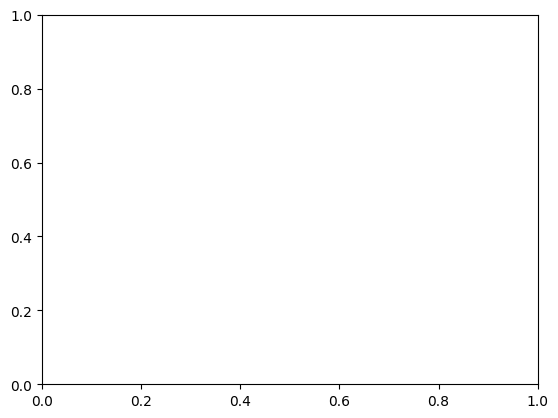

In [37]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [32]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570364
0.9827976465386898
